# Breast Cancer Dataset

In [1]:
# Step 1 - Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, roc_auc_score,
                             precision_recall_curve, average_precision_score)
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
import joblib

# Plotting style
sns.set(style="whitegrid")
%matplotlib inline


In [3]:
# Step 2 - Load dataset
df = pd.read_csv("breast-cancer.csv")

# Quick exploration
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe().T)
print("\nMissing values per column:\n", df.isnull().sum())


Shape: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01



Missing values per column:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Target & feature setup

In [4]:
# Step 3 - target and features
# Inspect column names
print("Columns:", df.columns.tolist())

# If target is 'target' use it; else adapt:
# Common variants: 'target', 'diagnosis' (M/B), 'class'
# Example handle different names:
possible_targets = ['target', 'diagnosis', 'class', 'label']
target_col = None
for c in possible_targets:
    if c in df.columns:
        target_col = c
        break
if target_col is None:
    # If not found, choose last column as target (confirm manually)
    target_col = df.columns[-1]
print("Using target column:", target_col)

# If diagnosis is M/B convert to 1/0
if df[target_col].dtype == 'object':
    print("Mapping string labels to numeric...")
    df[target_col] = pd.Categorical(df[target_col]).codes  # e.g., B->0, M->1

y = df[target_col].copy()
X = df.drop(columns=[target_col])

print("Feature shape:", X.shape, "Target distribution:\n", y.value_counts(normalize=True))


Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Using target column: diagnosis
Mapping string labels to numeric...
Feature shape: (569, 31) Target distribution:
 diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


### EDA visualizations

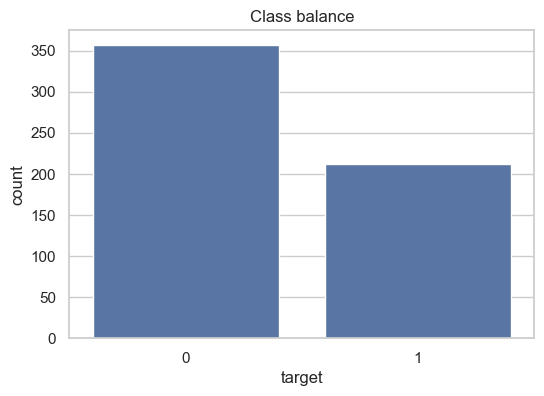

In [5]:
# Step 4.1 - class balance
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class balance")
plt.xlabel("target")
plt.ylabel("count")
plt.show()


<Figure size 1400x1000 with 0 Axes>

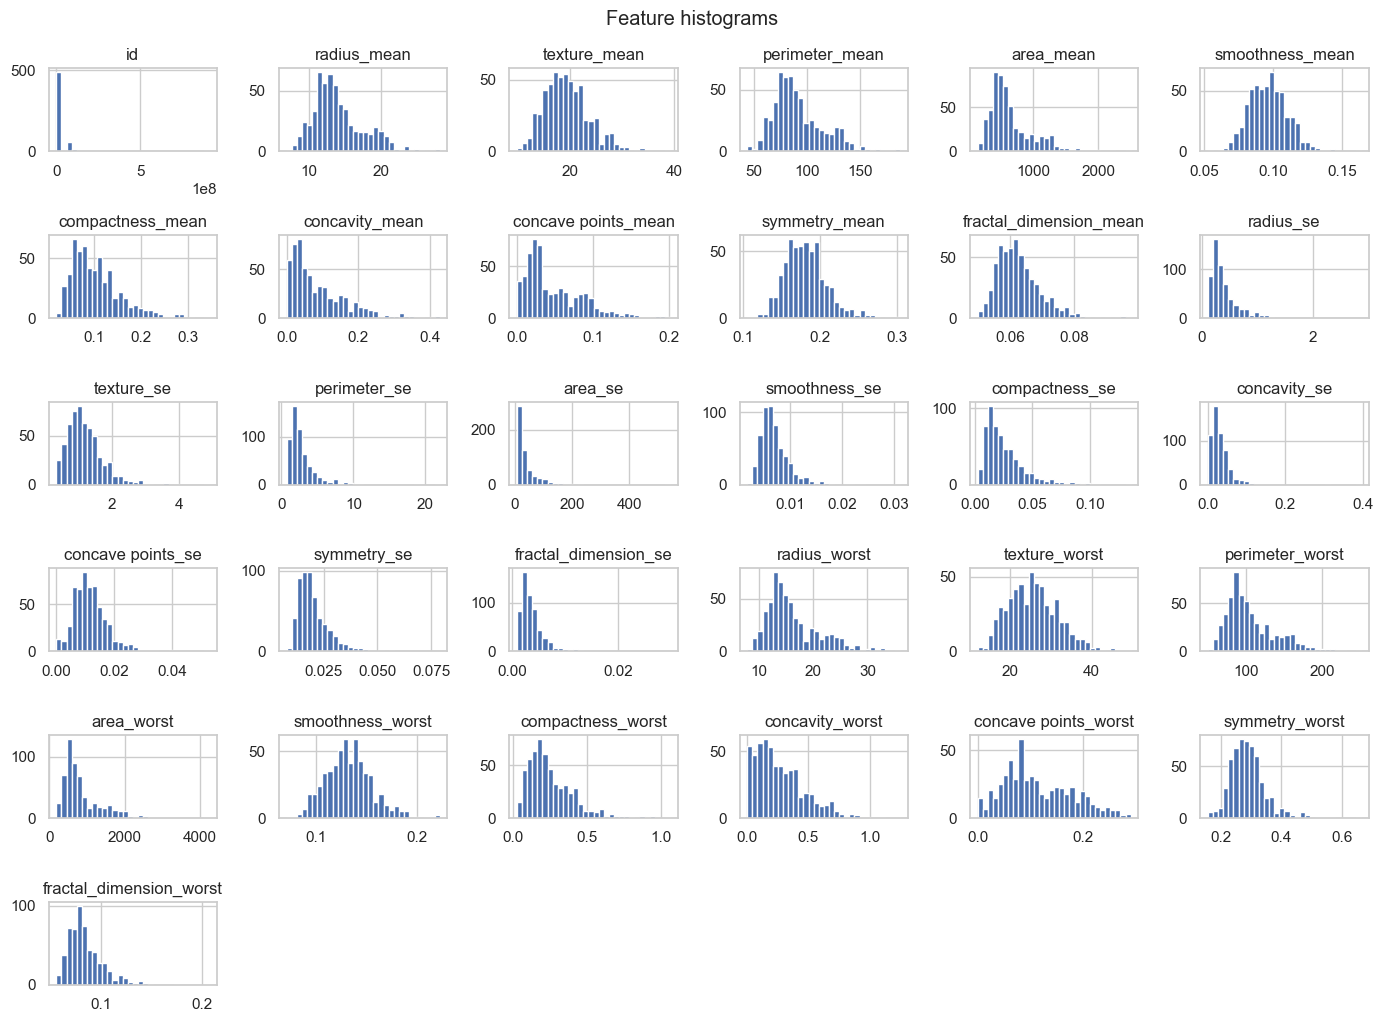

In [6]:
# Step 4.2 - histograms for numeric features
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(14,10))
X[num_cols].hist(bins=30, figsize=(14,10))
plt.tight_layout()
plt.suptitle("Feature histograms", y=1.02)
plt.show()


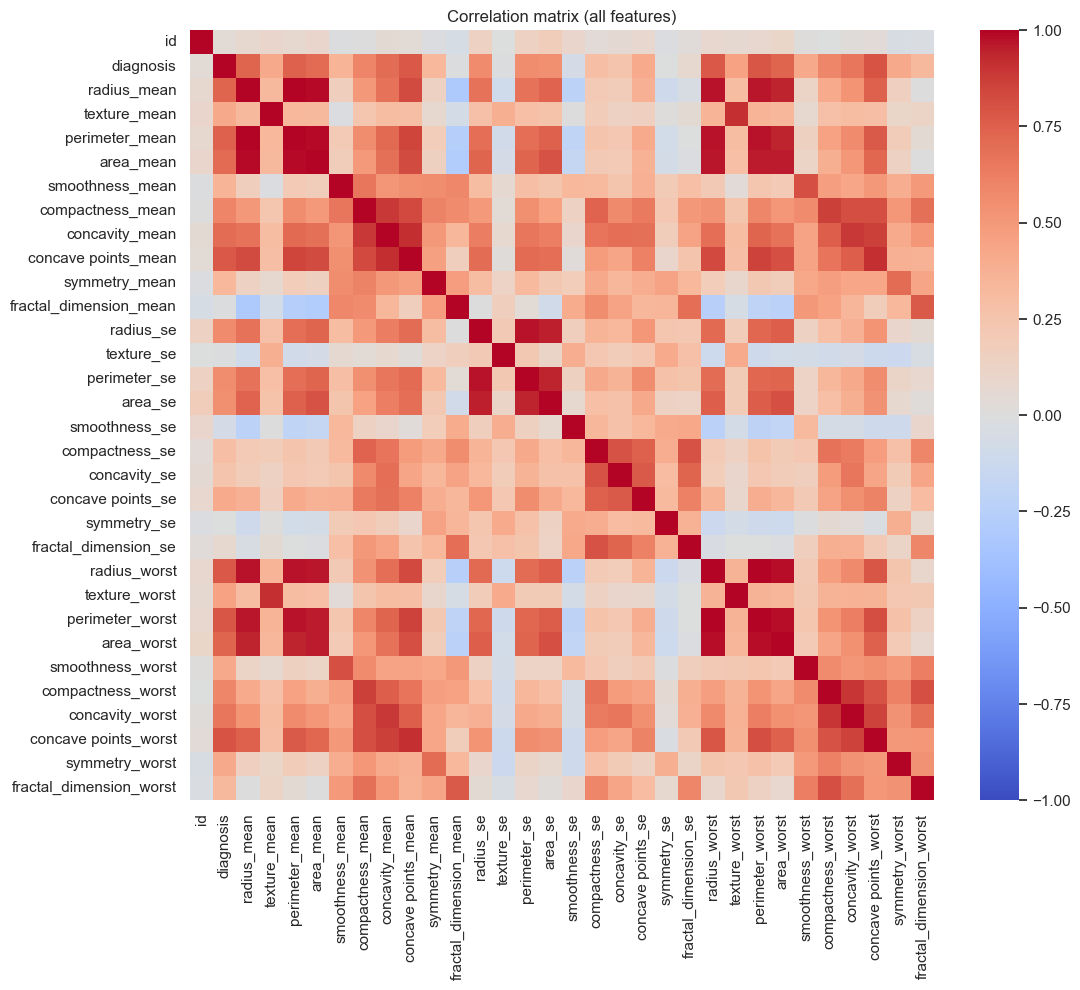

In [7]:
# Step 4.3 - correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation matrix (all features)")
plt.show()


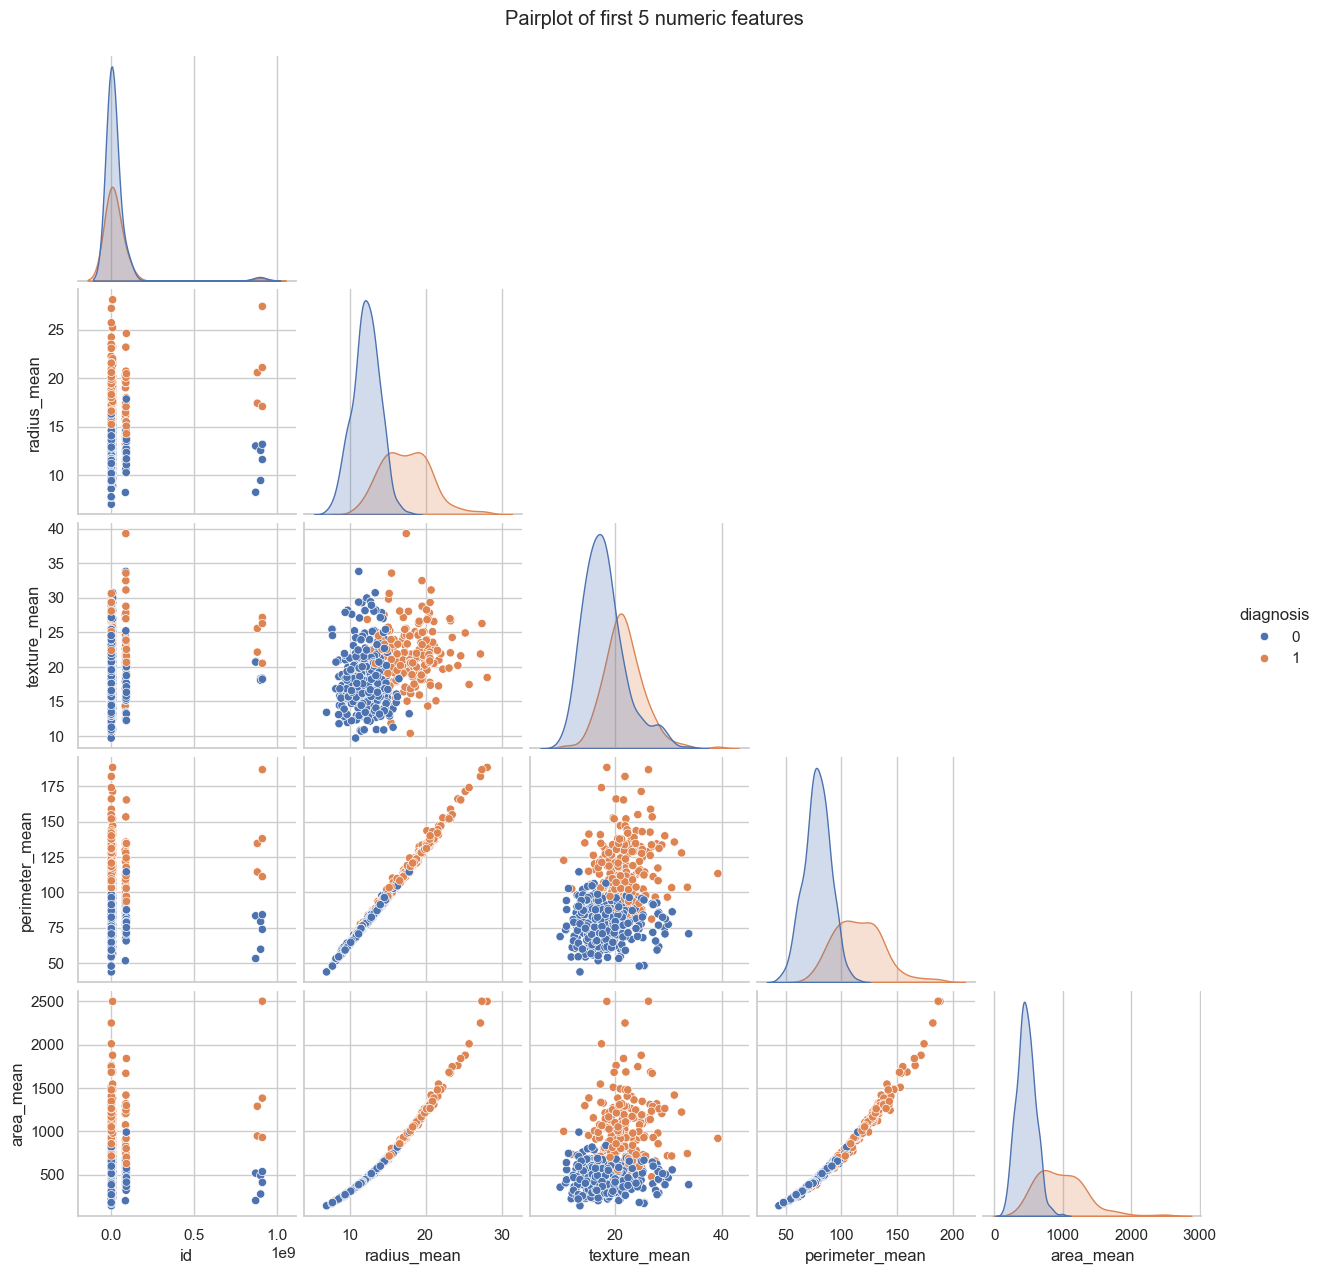

In [8]:
# Step 4.4 - pairplot (first 5 features) to visualize class separation
subset_cols = num_cols[:5] + [target_col]
sns.pairplot(df[subset_cols], hue=target_col, corner=True)
plt.suptitle("Pairplot of first 5 numeric features", y=1.02)
plt.show()


### Preprocessing — train/test split & scaling

In [9]:
# Step 5 - train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Step 5.1 - scaling (fit on train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train shape: (455, 31) Test shape: (114, 31)


### Baseline models — Linear SVM & RBF SVM

In [10]:
# Step 6 - train baseline SVMs
# Linear SVM
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_lin = svm_linear.predict(X_test_scaled)
print("Linear SVM accuracy:", accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))

# RBF SVM
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("RBF SVM accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Linear SVM accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

RBF SVM accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Model evaluation visualizations — ROC & Precision-Recall

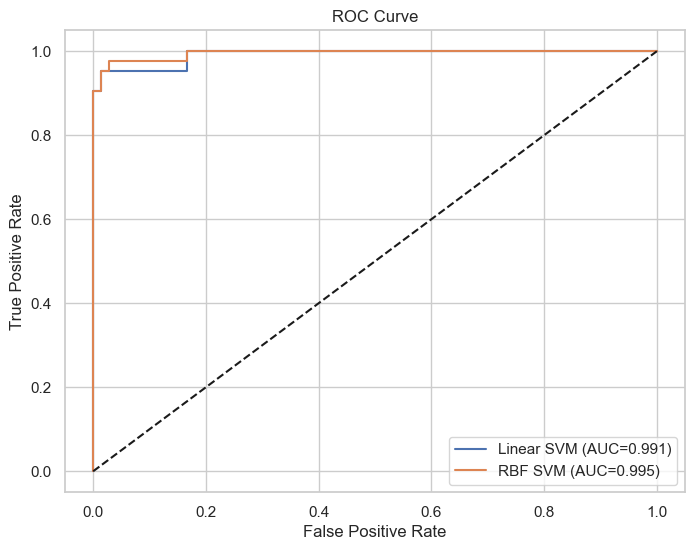

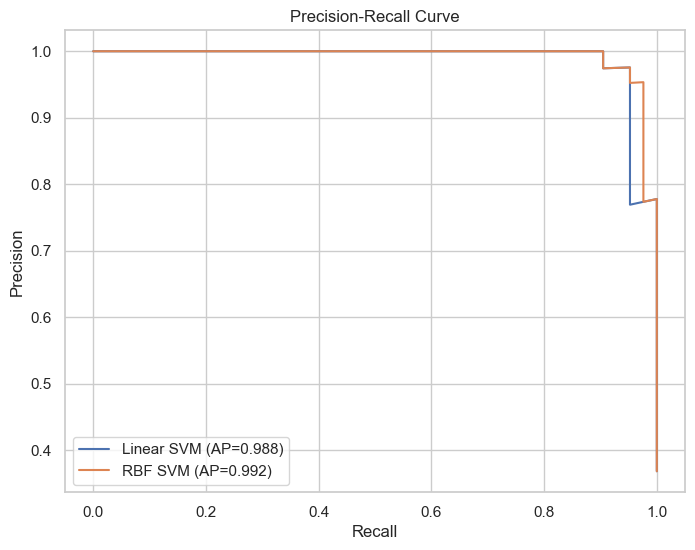

In [12]:
# Step 7 - ROC and PR curves
# Get probabilities
y_prob_lin = svm_linear.predict_proba(X_test_scaled)[:,1]
y_prob_rbf = svm_rbf.predict_proba(X_test_scaled)[:,1]

# ROC
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_prob_lin)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_rbf)
auc_lin = roc_auc_score(y_test, y_prob_lin)
auc_rbf = roc_auc_score(y_test, y_prob_rbf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lin, tpr_lin, label=f'Linear SVM (AUC={auc_lin:.3f})')
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF SVM (AUC={auc_rbf:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall
prec_lin, rec_lin, _ = precision_recall_curve(y_test, y_prob_lin)
prec_rbf, rec_rbf, _ = precision_recall_curve(y_test, y_prob_rbf)
ap_lin = average_precision_score(y_test, y_prob_lin)
ap_rbf = average_precision_score(y_test, y_prob_rbf)

plt.figure(figsize=(8,6))
plt.plot(rec_lin, prec_lin, label=f'Linear SVM (AP={ap_lin:.3f})')
plt.plot(rec_rbf, prec_rbf, label=f'RBF SVM (AP={ap_rbf:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Hyperparameter tuning — GridSearchCV for RBF SVM

In [13]:
# Step 8 - GridSearch for RBF SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)

best_svm = grid.best_estimator_
y_best_pred = best_svm.predict(X_test_scaled)
y_best_prob = best_svm.predict_proba(X_test_scaled)[:,1]
print("Test accuracy (best SVM):", accuracy_score(y_test, y_best_pred))
print("Test AUC (best SVM):", roc_auc_score(y_test, y_best_prob))
print(classification_report(y_test, y_best_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV AUC: 0.9955624355005159
Test accuracy (best SVM): 0.9736842105263158
Test AUC (best SVM): 0.996031746031746
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Cross-validation

In [14]:
# Step 9 - cross-validation
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print("CV AUC scores:", cv_scores)
print("Mean CV AUC:", cv_scores.mean())


CV AUC scores: [0.99690402 1.         0.9871001  0.99845201 0.99535604]
Mean CV AUC: 0.9955624355005159


### Decision boundary visualization (2D via PCA)

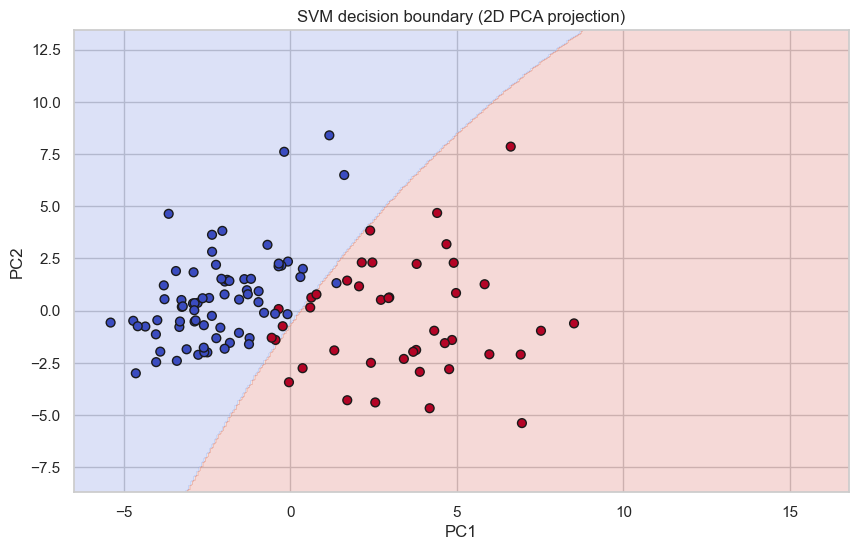

In [15]:
# Step 10 - Decision boundary using PCA projection (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.transform(X))  # scale full X then PCA for clarity

# Split the PCA-projected data similarly
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Train an RBF SVM on the PCA 2D data (for visualization only)
svm_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], probability=True)
svm_vis.fit(X_pca_train, y_pca_train)

# Create grid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 300),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 300))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X_pca_test[:,0], X_pca_test[:,1], c=y_pca_test, cmap='coolwarm', edgecolor='k', s=40)
plt.title("SVM decision boundary (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### Feature importance for linear SVM & permutation importance for best SVM

texture_worst           1.085290
concave points_mean     0.874688
concavity_mean          0.870357
concavity_worst         0.854562
radius_se               0.805016
area_se                 0.798949
area_worst              0.713092
texture_se             -0.640685
radius_worst            0.536491
compactness_se         -0.527162
symmetry_worst          0.500596
fractal_dimension_se   -0.494657
compactness_worst      -0.367640
compactness_mean       -0.335487
area_mean               0.293039
dtype: float64

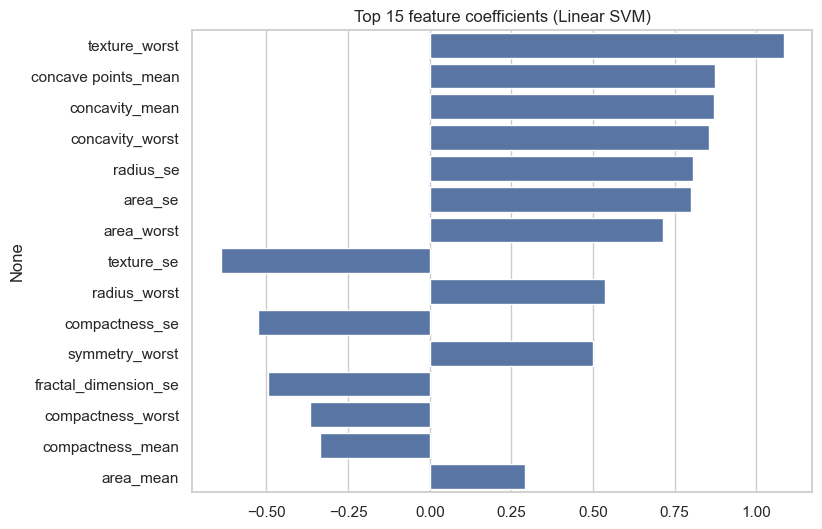

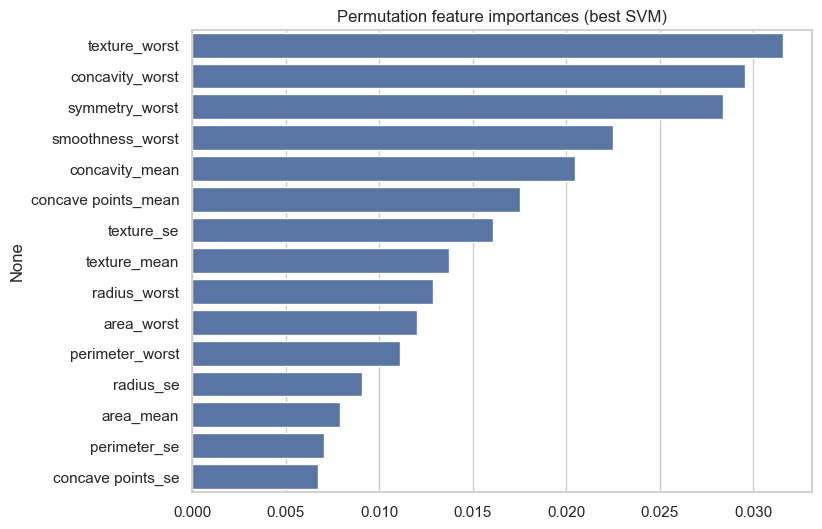

In [17]:
# Step 11 - Linear SVM coefficients (if you trained a linear SVM)
if hasattr(svm_linear, "coef_"):
    coef = pd.Series(svm_linear.coef_[0], index=X.columns).sort_values(key=lambda x: x.abs(), ascending=False)
    display(coef.head(15))
    plt.figure(figsize=(8,6))
    sns.barplot(x=coef.values[:15], y=coef.index[:15])
    plt.title("Top 15 feature coefficients (Linear SVM)")
    plt.show()

# Permutation importance for best SVM (model-agnostic)
res = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importances = pd.Series(res.importances_mean, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=perm_importances.values[:15], y=perm_importances.index[:15])
plt.title("Permutation feature importances (best SVM)")
plt.show()


### Confusion matrix & Classification report

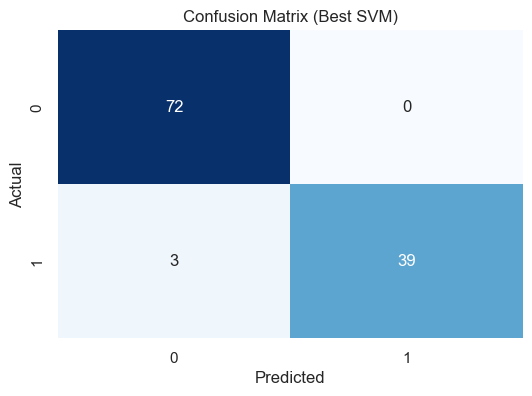

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [18]:
# Step 12 - confusion matrix for best model
y_pred_final = best_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best SVM)")
plt.show()

print(classification_report(y_test, y_pred_final))


### Save the best model & scaler

In [19]:
# Step 13 - save model and scaler
joblib.dump(best_svm, "best_svm_breast_cancer.joblib")
joblib.dump(scaler, "scaler_breast_cancer.joblib")
print("Saved best_svm_breast_cancer.joblib and scaler_breast_cancer.joblib")

Saved best_svm_breast_cancer.joblib and scaler_breast_cancer.joblib
